In [1]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely
!pip install chart-studio

In [136]:
import plotly.figure_factory as ff
import geopandas as gp
import numpy as np
import pandas as pd
import plotly.offline as py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from chart_studio.plotly import plot, iplot
import shapely

In [192]:
# https://chart-studio.plotly.com/~jackp/18292/plotting-d3js-county-choropleth-maps-in/#/
# df = gp.read_file("/Users/jackparmer/Downloads/cb_2016_us_county_500k/cb_2016_us_county_500k.shp")

df = gp.read_file('Resources/cb_2018_us_zcta510_500k.shp')

# Created Pandas DataFrame to rename (ZCTA5CE10 as Zipcode)
df_pd = pd.DataFrame(df)
df_pd = df_pd.rename(columns={"ZCTA5CE10":"Zipcode"})

# Converted df Zipcode column to int
df_pd["Zipcode"] = df_pd["Zipcode"].astype(int)

# Saving a CSV file named "california_census_data"
california_data = pd.read_csv("Resources/california_census_data.csv")

# Converted df Zipcode column to int
california_data["Zipcode"] = california_data["Zipcode"].astype(int)

# Merged df_pd and california_pd by "Zipcode"
california_merged = pd.merge(df_pd, california_data, how="inner", on="Zipcode")

# Created a GeoDataFrame
california_geodata = gp.GeoDataFrame(california_merged, geometry='geometry')

<IPython.core.display.Javascript object>


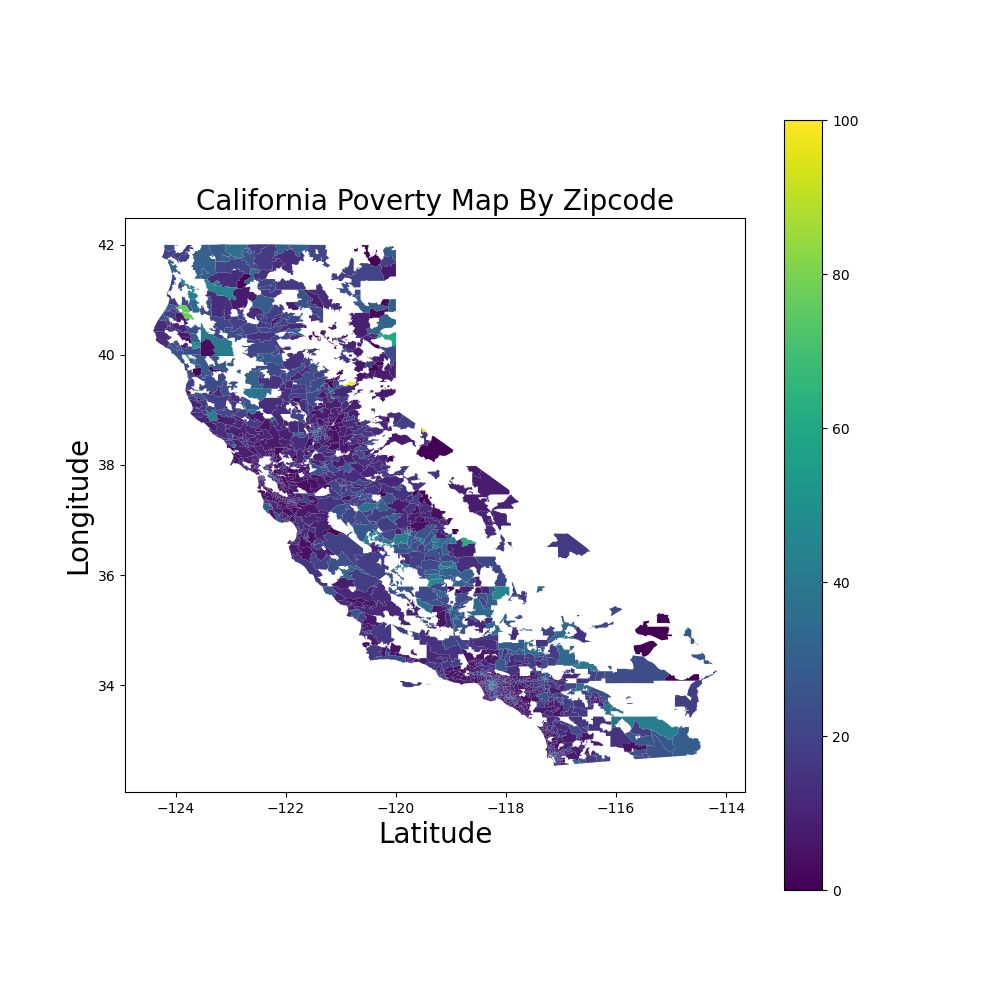

In [193]:
# Plotted California Geo Data Choropleth Map 'Poverty Rate'

california_geodata.plot(figsize=(10,10), column='Poverty Rate', legend=True);
plt.title("California Poverty Map By Zipcode", fontsize=20);
plt.xlabel("Latitude", fontsize=20);
plt.ylabel("Longitude", fontsize=20)

plt.savefig("Choropleth Map By Zipcode")

In [194]:
# Choropleth Map Function to Plot
# Note: Function cannot plot payday location data, figure out how to plot multiple layers later. 

def map_choropleth(df, variable, color_code, plot_title) :
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_aspect('equal')
    df.plot(column = variable, legend=True, cmap= color_code, ax=ax);
    plt.title(plot_title, fontsize=20);
    plt.xlabel("Latitude", fontsize=20);
    plt.ylabel("Longitude", fontsize=20);

# Available Map Choropleth Styles and Colors
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
# 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
#             'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
#             'hot', 'afmhot', 'gist_heat', 'copper', 'seismic', 'nipy_spectral', 'gist_rainbow']   

<IPython.core.display.Javascript object>


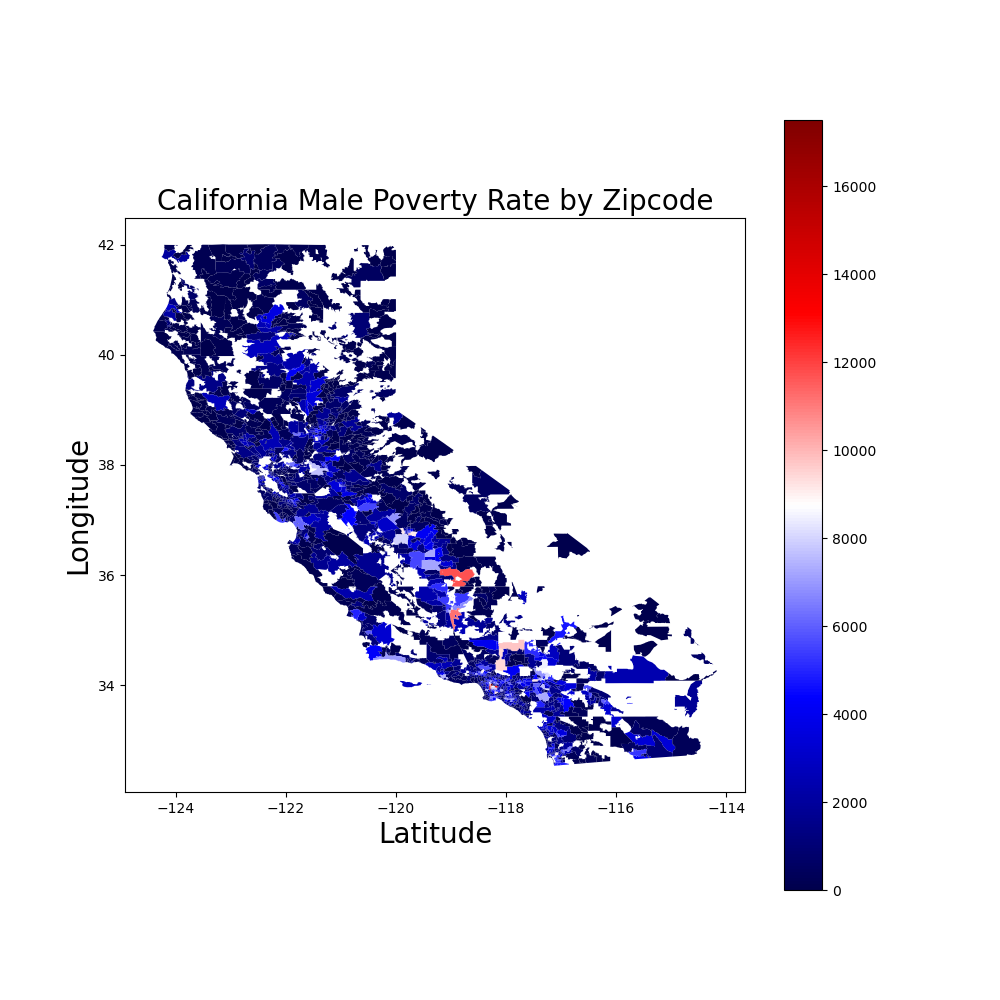

In [195]:
map_choropleth(california_geodata, 'poverty_male', 'seismic', 'California Male Poverty Rate by Zipcode')

<IPython.core.display.Javascript object>


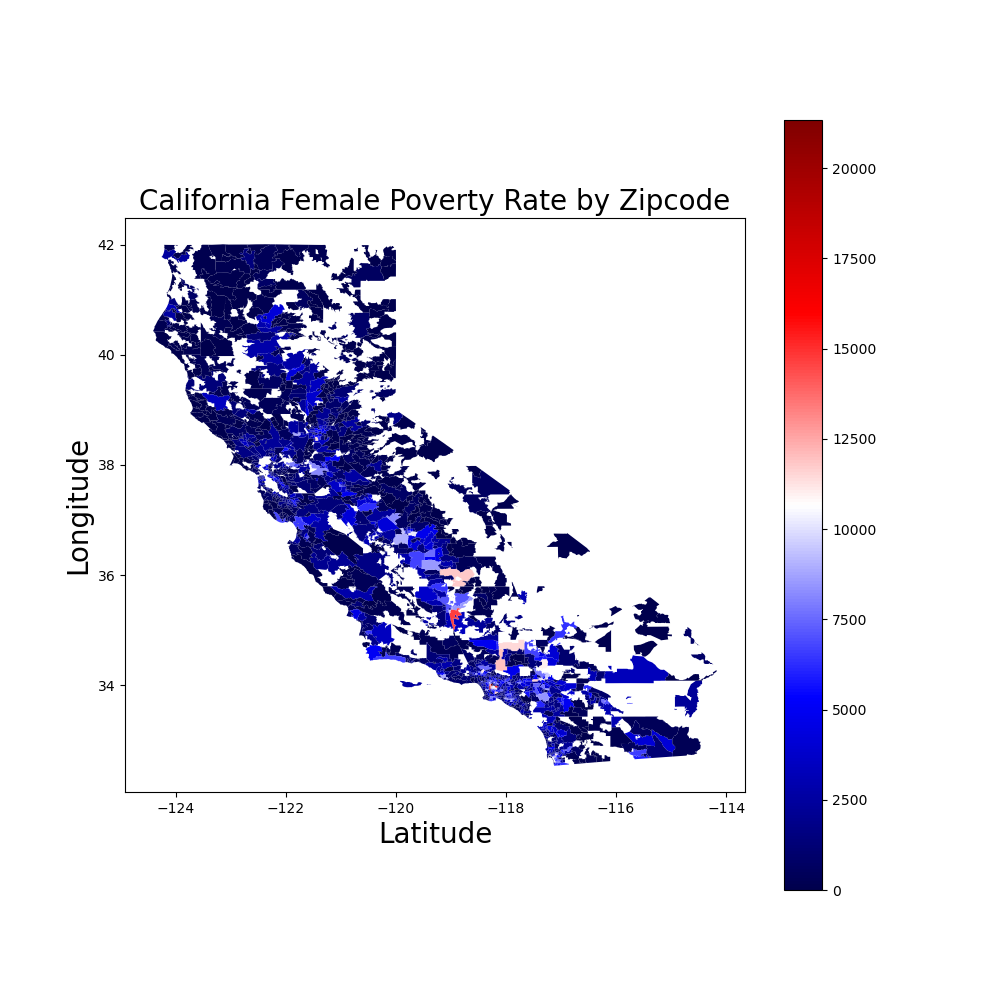

In [196]:
map_choropleth(california_geodata, 'poverty_female', 'seismic', 'California Female Poverty Rate by Zipcode')

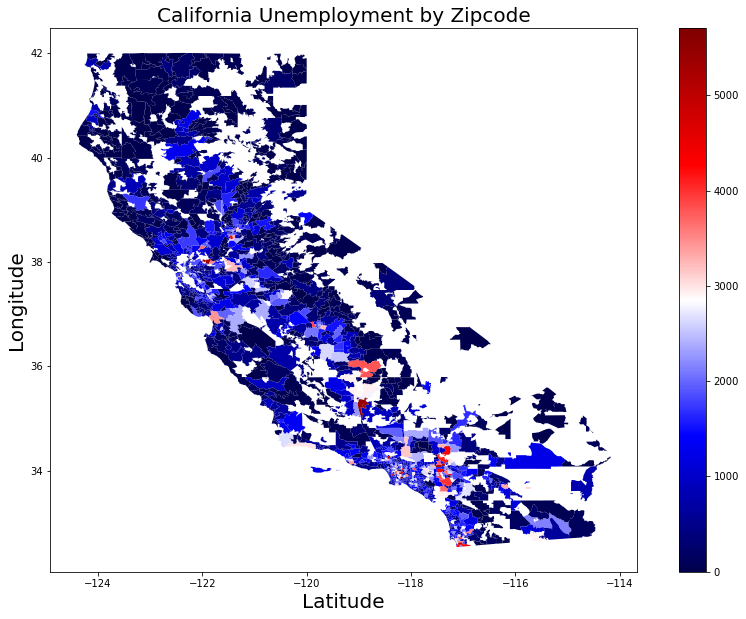

In [18]:
map_choropleth(california_geodata, 'employment_unemployed', 'seismic', 'California Unemployment by Zipcode')

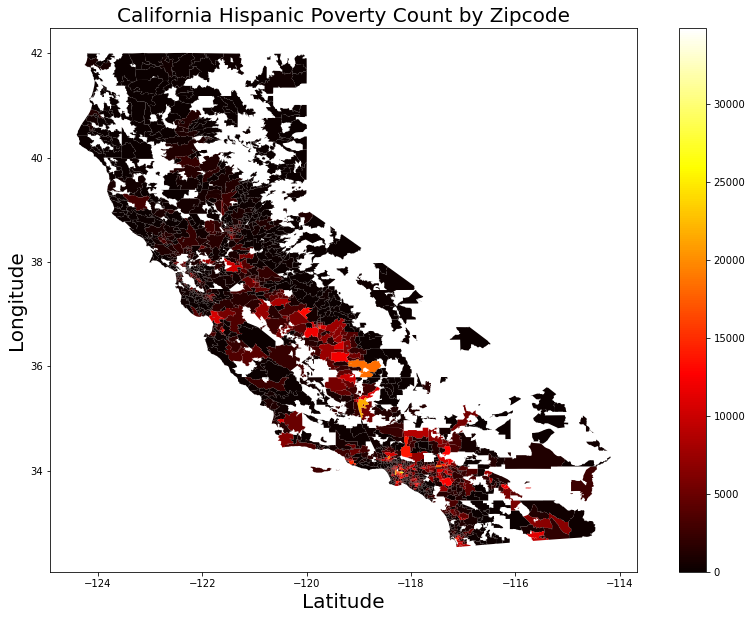

In [19]:
map_choropleth(california_geodata, 'poverty_hispanic_origin', 'hot', 'California Hispanic Poverty Count by Zipcode')

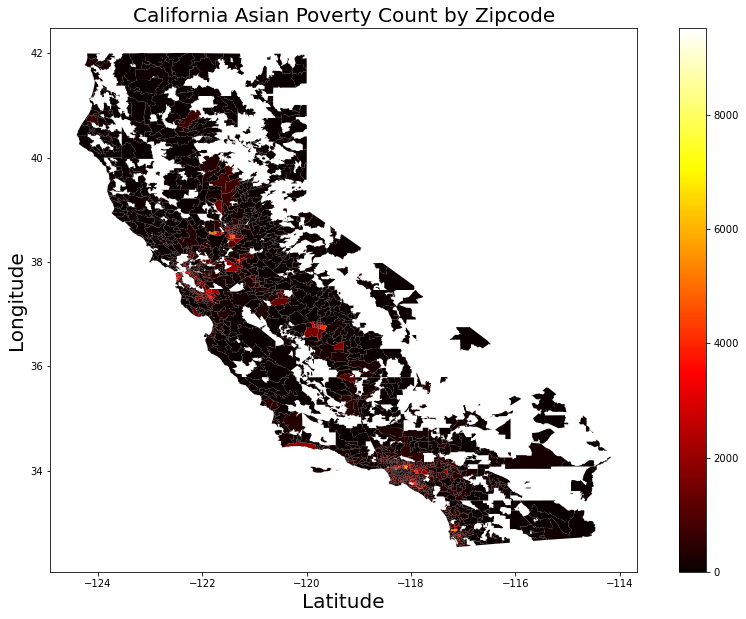

In [20]:
map_choropleth(california_geodata, 'poverty_asian_alone', 'hot', 'California Asian Poverty Count by Zipcode')

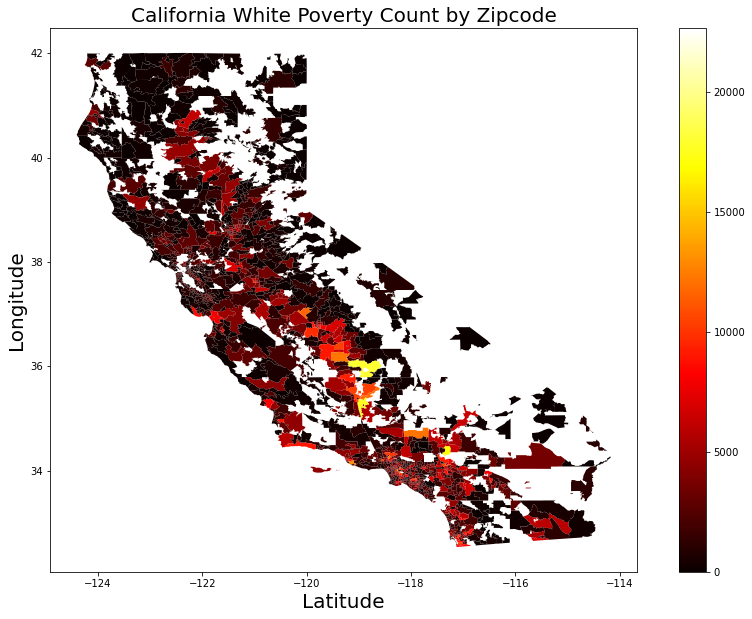

In [21]:
map_choropleth(california_geodata, 'poverty_white_alone', 'hot', 'California White Poverty Count by Zipcode')

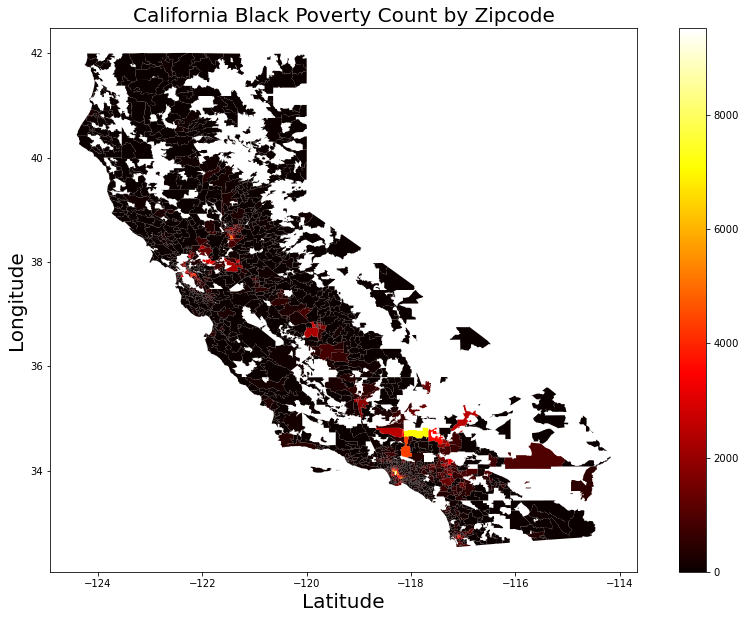

In [22]:
map_choropleth(california_geodata, 'poverty_black_alone', 'hot', 'California Black Poverty Count by Zipcode')

Los Angeles County Analysis

* Plot poverty rate in LA County
* Plot racial poverty demographics in LA County
* Overlay with Payday Lendor Locations
* Minority Poverty Rate Map (Statewide / LA County)

In [24]:
# Importing Payday Lender Location Data

payday_national = pd.read_csv('Resources/Combined_Clean_PaydayLenderLocations.csv')
payday_national

Zip Code                       Payday Vendor  \
0        90001                    ACE Cash Express   
1        90001                      Easy Financial   
2        90002                    ACE Cash Express   
3        90002       Continental Currency Services   
4        90002             The Check Cashing Place   
...        ...                                 ...   
2521     96150           Western Highland Mortgage   
2522     96150                           MoneyGram   
2523     96161        Sierra Mountain Mortgage Inc   
2524     96161  Happy Investments, Inc. Truckee Ca   
2525     96161      Wells Fargo Insurance Services   

                                                Address        Lat         Lng  
0     1232 E Florence Ave, Los Angeles, CA 90001, Un...  33.974583 -118.252963  
1     6003 Compton Ave, Los Angeles, CA 90001, Unite...  33.985552 -118.248060  
2     10005 S Central Ave, Los Angeles, CA 90002, Un...  33.945482 -118.254526  
3     1669 E 103rd St, Los Angeles, CA 90002, United...  33.943856 -118.244298  
4     2284 E Firestone Blvd, Los Angeles, CA 90002, ...  33.957857 -118.231333  
...                                                 ...        ...         ...  
2521  3170 US-50, South Lake Tahoe, CA 96150, United...  38.852693 -120.020465  
2522  3471 Lake Tahoe Blvd, South Lake Tahoe, CA 961...  38.946675 -119.964723  
2523  10098 Jibboom St # 201, Truckee, CA 96161, Uni...  39.328434 -120.186173  
2524  11260 Donner Pass Road C1 # 1014-G, Truckee, C...  39.327165 -120.205797  
2525                   Truckee, CA 96161, United States  39.327962 -120.183253  

[2526 rows x 5 columns]

In [33]:
# Subsetting Payday Lender Data "Zip Code", "Payday Vendor", "Lat", "Lng"

payday_locations = payday_national[["Zip Code", "Payday Vendor", "Lat", "Lng"]]
payday_locations

Zip Code                       Payday Vendor        Lat         Lng
0        90001                    ACE Cash Express  33.974583 -118.252963
1        90001                      Easy Financial  33.985552 -118.248060
2        90002                    ACE Cash Express  33.945482 -118.254526
3        90002       Continental Currency Services  33.943856 -118.244298
4        90002             The Check Cashing Place  33.957857 -118.231333
...        ...                                 ...        ...         ...
2521     96150           Western Highland Mortgage  38.852693 -120.020465
2522     96150                           MoneyGram  38.946675 -119.964723
2523     96161        Sierra Mountain Mortgage Inc  39.328434 -120.186173
2524     96161  Happy Investments, Inc. Truckee Ca  39.327165 -120.205797
2525     96161      Wells Fargo Insurance Services  39.327962 -120.183253

[2526 rows x 4 columns]

In [25]:
# Payday Lender locations in Los Angeles County

Los_Angeles = california_geodata[california_geodata['County']=="Los Angeles"]

In [197]:
# Calculated the percentage of the population that is minority living in poverty in Los Angeles County

Los_Angeles['all_minority_poverty'] = (Los_Angeles['poverty_black_alone'] + Los_Angeles['population_american_indian_alone'] + Los_Angeles['poverty_asian_alone'] + Los_Angeles['poverty_native_hawaiian_alone'] + Los_Angeles['poverty_hispanic_origin'] + Los_Angeles['poverty_two_or_more_races'])/Los_Angeles['Population']*100

In [55]:
# Los Angeles County location data to GeoDataFrame with Geometry

LA_county_paydayloc = pd.merge(Los_Angeles, payday_locations, left_on="Zipcode", right_on="Zip Code", how="inner")
LA_county_paydayloc = LA_county_paydayloc[["Payday Vendor", "Lat", "Lng"]]
LA_geometries = [Point(xy) for xy in zip(LA_county_paydayloc.Lng, LA_county_paydayloc.Lat)]
LA_county_paydaylocgeo = gp.GeoDataFrame(LA_county_paydayloc, geometry=LA_geometries)

<IPython.core.display.Javascript object>


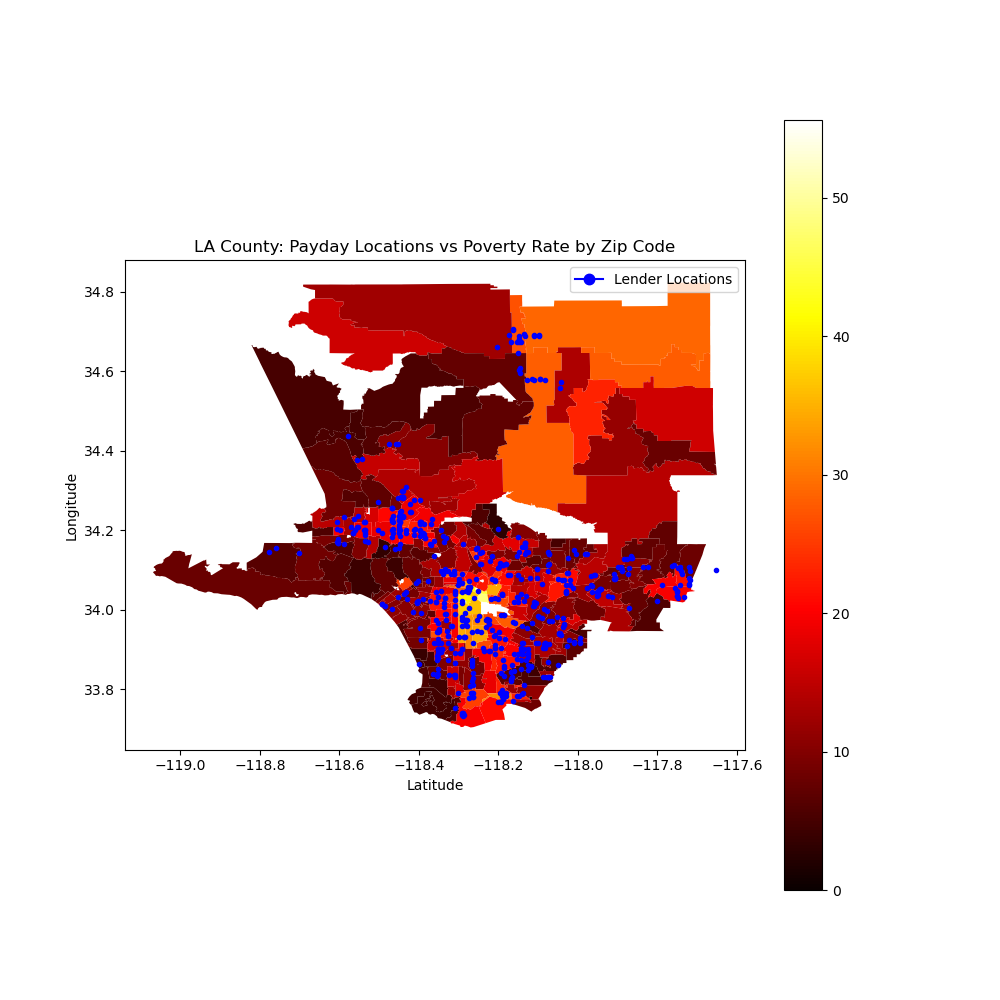

In [142]:
# Plot LA County Payday Locations vs Poverty Rate

marker_legend = mlines.Line2D([], [], color="blue", marker=".", 
                             markersize=15, label="Lender Locations")
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Los_Angeles.plot(column = 'Poverty Rate', legend=True, cmap='hot', ax=ax);
plt.title('LA County: Payday Locations vs Poverty Rate by Zip Code', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend])
LA_county_paydaylocgeo.plot(ax=ax, marker='.', color='blue')

fig.savefig("LA County: Payday Locations vs Poverty Rate by Zip Code.png")

<IPython.core.display.Javascript object>


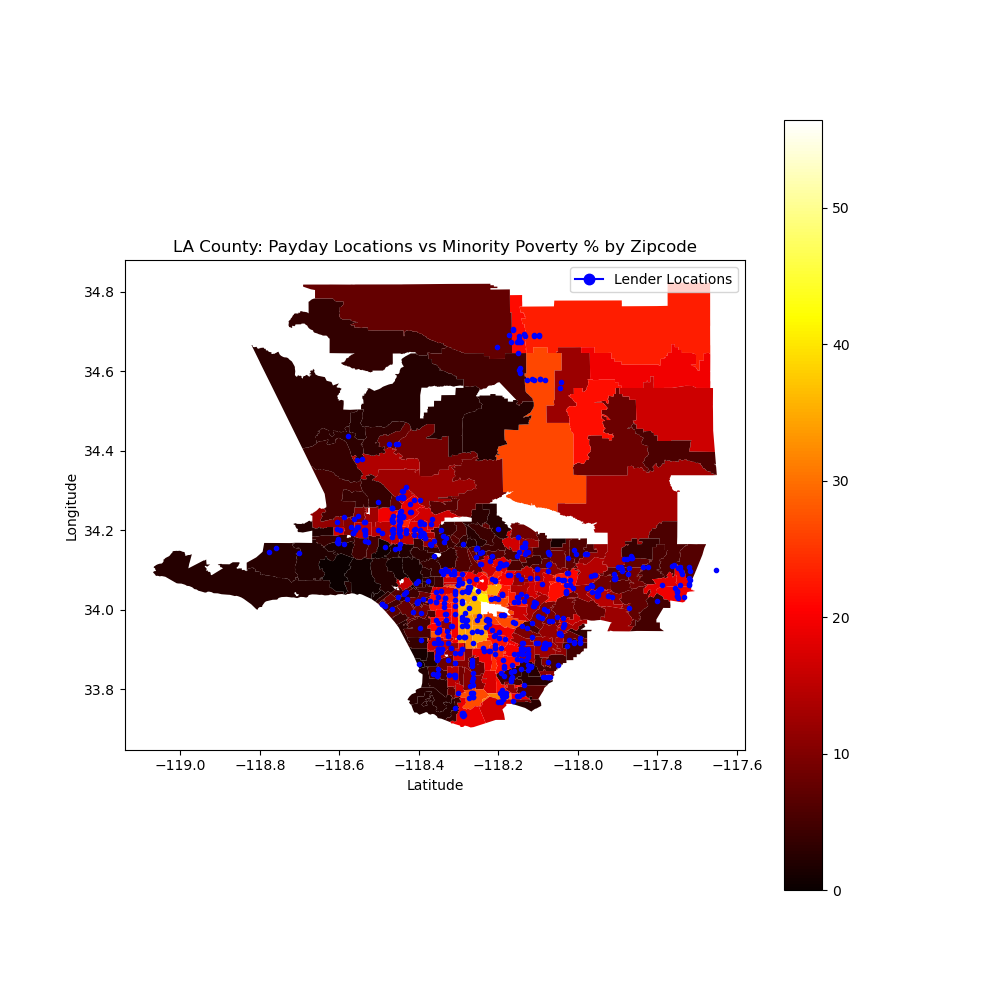

In [143]:
# Plot LA County Payday Locations vs Minority Poverty %

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Los_Angeles.plot(column = 'all_minority_poverty', legend=True, cmap='hot', ax=ax);
plt.title('LA County: Payday Locations vs Minority Poverty % by Zipcode', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend]);
LA_county_paydaylocgeo.plot(ax=ax, marker='.', color='blue');

fig.savefig("LA County: Payday Locations vs Minority Poverty % by Zipcode.png")

In [145]:
# Payday Lender locations in Orange County

Orange_County = california_geodata[california_geodata['County']=="Orange"]

In [147]:
# Orange County location data to GeoDataFrame with Geometry

Orange_County_paydayloc = pd.merge(Orange_County, payday_locations, left_on="Zipcode", right_on="Zip Code", how="inner")
Orange_County_paydayloc = Orange_County_paydayloc[["Payday Vendor", "Lat", "Lng"]]
Orange_geometries = [Point(xy) for xy in zip(Orange_County_paydayloc.Lng, Orange_County_paydayloc.Lat)]
Orange_County_paydaylocgeo = gp.GeoDataFrame(Orange_County_paydayloc, geometry=Orange_geometries)

<IPython.core.display.Javascript object>


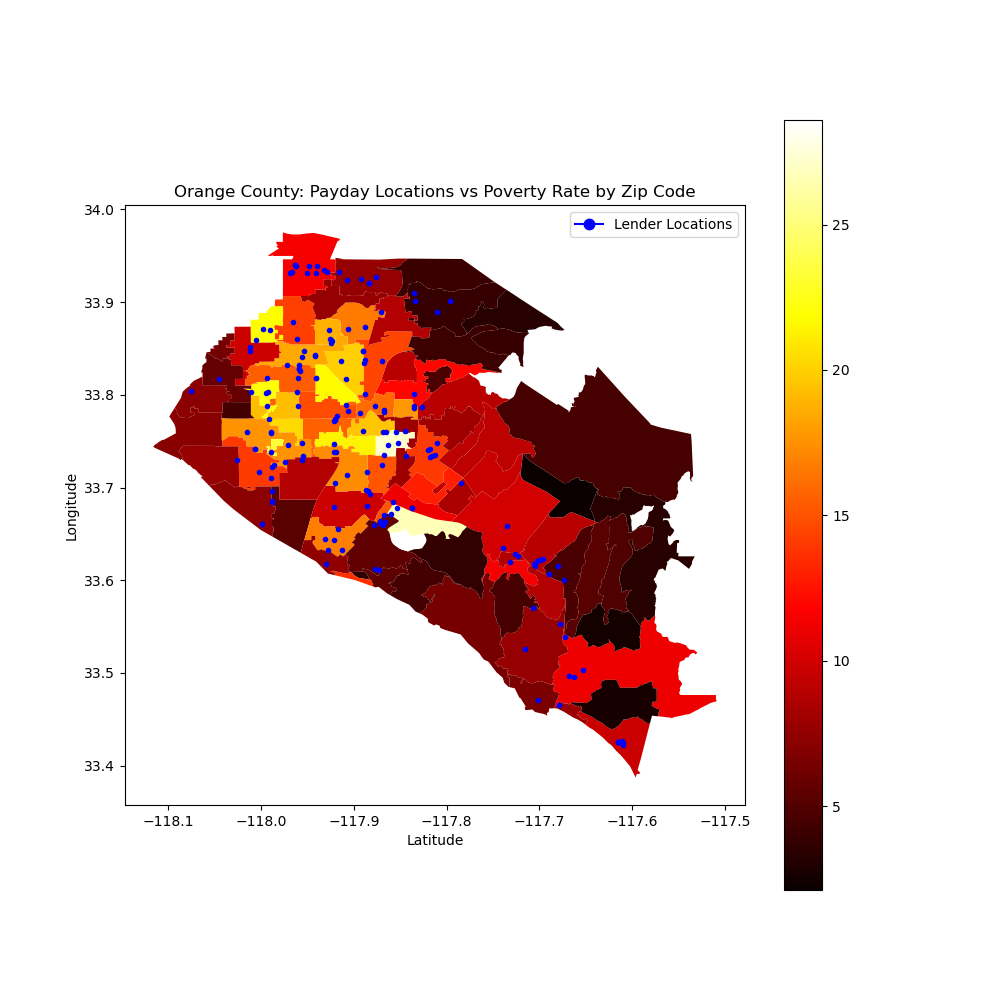

In [172]:
# Plot Orange County Payday Locations vs Poverty Rate

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Orange_County.plot(column = 'Poverty Rate', legend=True, cmap='hot', ax=ax);
plt.title('Orange County: Payday Locations vs Poverty Rate by Zip Code', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend])
Orange_County_paydaylocgeo.plot(ax=ax, marker='.', color='blue')

fig.savefig("Orange County: Payday Locations vs Poverty Rate by Zip Code.png")

In [150]:
# Payday Lender locations in San Diego County

San_Diego = california_geodata[california_geodata['County']=="San Diego"]

In [151]:
# San Diego County location data to GeoDataFrame with Geometry

San_Diego_paydayloc = pd.merge(San_Diego, payday_locations, left_on="Zipcode", right_on="Zip Code", how="inner")
San_Diego_paydayloc = San_Diego_paydayloc[["Payday Vendor", "Lat", "Lng"]]
San_Diego_geometries = [Point(xy) for xy in zip(San_Diego_paydayloc.Lng, San_Diego_paydayloc.Lat)]
San_Diego_paydaylocgeo = gp.GeoDataFrame(San_Diego_paydayloc, geometry=San_Diego_geometries)

<IPython.core.display.Javascript object>


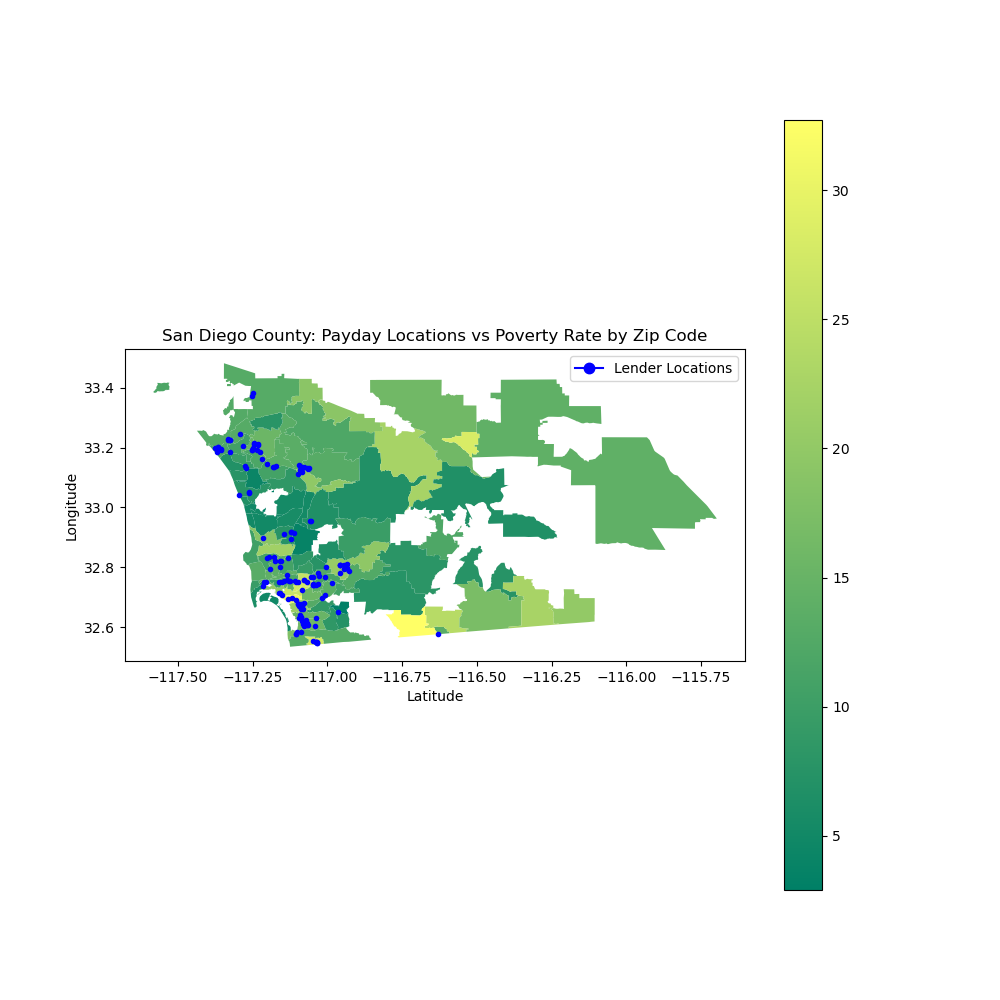

In [170]:
# Plot San Diego County Payday Locations vs Poverty Rate

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
San_Diego.plot(column = 'Poverty Rate', legend=True, cmap='summer', ax=ax);
plt.title('San Diego County: Payday Locations vs Poverty Rate by Zip Code', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend])
San_Diego_paydaylocgeo.plot(ax=ax, marker='.', color='blue')

fig.savefig("San Diego County: Payday Locations vs Poverty Rate by Zip Code.png")

In [153]:
# Payday Lender locations in Imperial County

Imperial = california_geodata[california_geodata['County']=="Imperial"]

In [154]:
# Imperial County location data to GeoDataFrame with Geometry

Imperial_paydayloc = pd.merge(Imperial, payday_locations, left_on="Zipcode", right_on="Zip Code", how="inner")
Imperial_paydayloc = Imperial_paydayloc[["Payday Vendor", "Lat", "Lng"]]
Imperial_geometries = [Point(xy) for xy in zip(Imperial_paydayloc.Lng, Imperial_paydayloc.Lat)]
Imperial_paydaylocgeo = gp.GeoDataFrame(Imperial_paydayloc, geometry=Imperial_geometries)

<IPython.core.display.Javascript object>


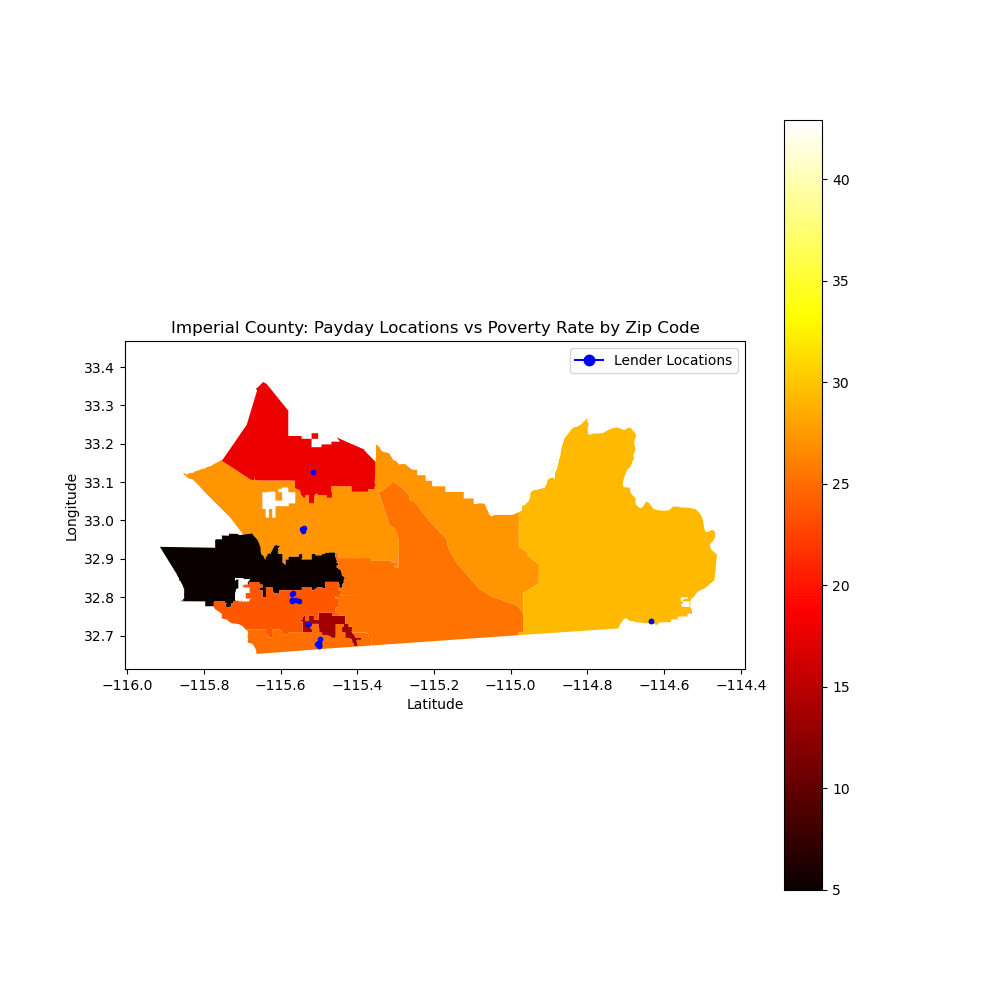

In [164]:
# Plot Imperial County Payday Locations vs Poverty Rate

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Imperial.plot(column = 'Poverty Rate', legend=True, cmap='hot', ax=ax);
plt.title('Imperial County: Payday Locations vs Poverty Rate by Zip Code', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend])
Imperial_paydaylocgeo.plot(ax=ax, marker='.', color='blue')

fig.savefig("Imperial County: Payday Locations vs Poverty Rate by Zip Code.png")

In [157]:
# Payday Lender locations in Marin County

Marin = california_geodata[california_geodata['County']=="Marin"]

In [198]:
# Calculated the percentage of the population that is minority living in poverty in Marin County

Marin['all_minority_poverty'] = (Marin['poverty_black_alone'] + Marin['population_american_indian_alone'] + Marin['poverty_asian_alone'] + Marin['poverty_native_hawaiian_alone'] + Marin['poverty_hispanic_origin'] + Marin['poverty_two_or_more_races'])/Marin['Population']*100

In [158]:
# Marin County location data to GeoDataFrame with Geometry

Marin_paydayloc = pd.merge(Marin, payday_locations, left_on="Zipcode", right_on="Zip Code", how="inner")
Marin_paydayloc = Marin_paydayloc[["Payday Vendor", "Lat", "Lng"]]
Marin_geometries = [Point(xy) for xy in zip(Marin_paydayloc.Lng, Marin_paydayloc.Lat)]
Marin_paydaylocgeo = gp.GeoDataFrame(Marin_paydayloc, geometry=Marin_geometries)

<IPython.core.display.Javascript object>


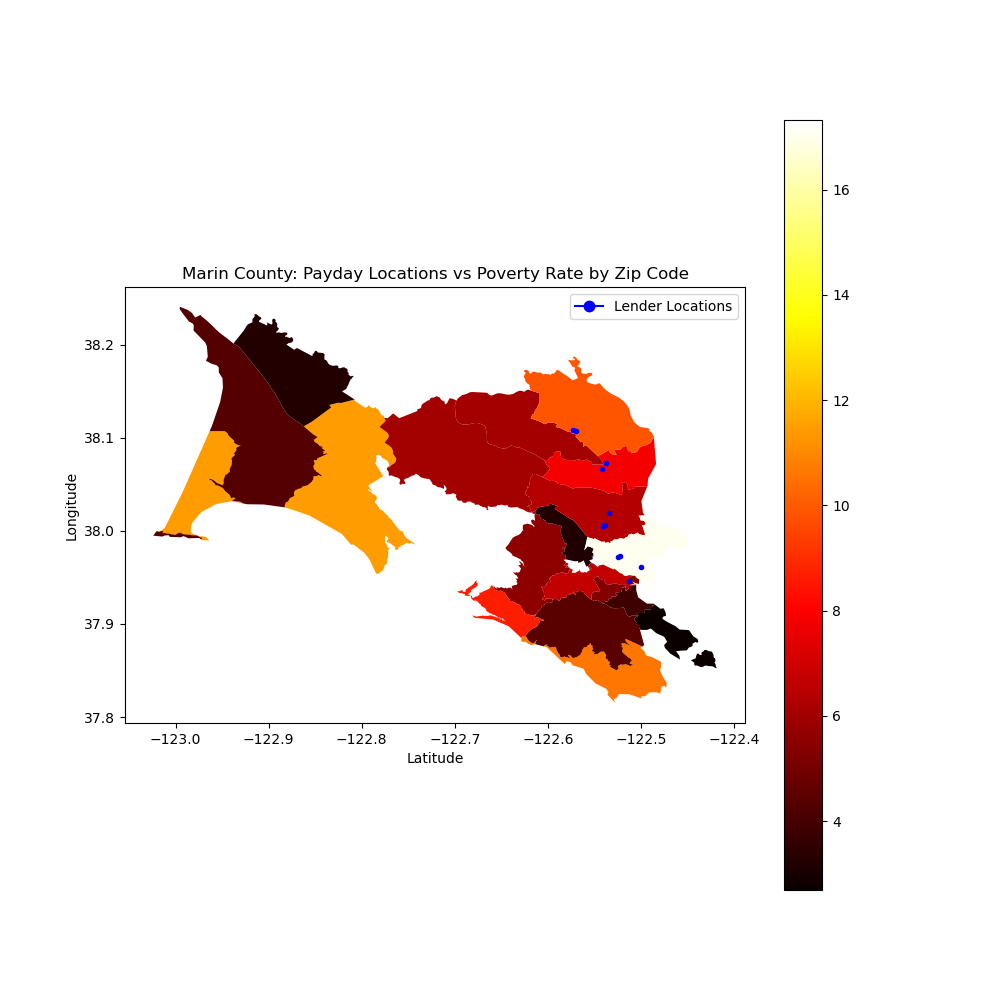

In [167]:
# Plot Marin County Payday Locations vs Poverty Rate

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Marin.plot(column = 'Poverty Rate', legend=True, cmap='hot', ax=ax);
plt.title('Marin County: Payday Locations vs Poverty Rate by Zip Code', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend])
Marin_paydaylocgeo.plot(ax=ax, marker='.', color='blue')

fig.savefig("Marin County: Payday Locations vs Poverty Rate by Zip Code.png")

<IPython.core.display.Javascript object>


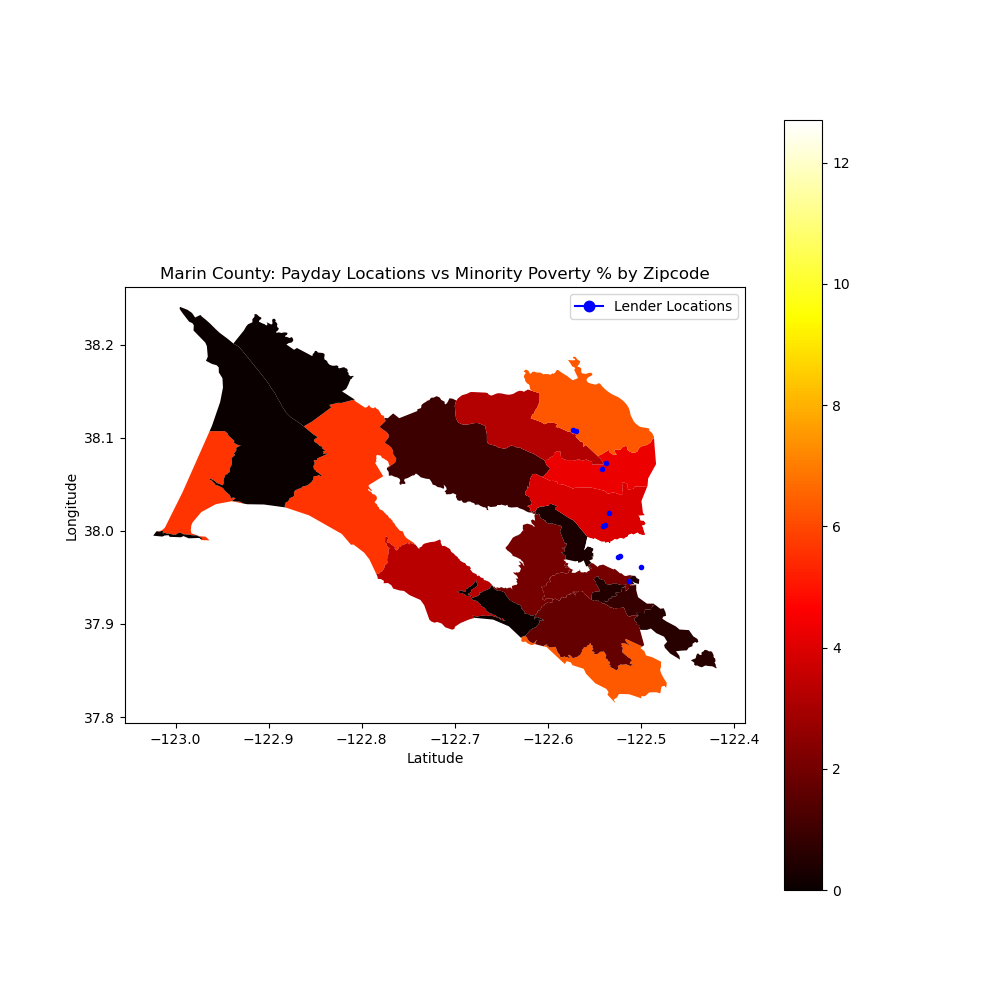

In [176]:
# Plot Marin County Payday Locations vs Minority Poverty %

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
Marin.plot(column = 'all_minority_poverty', legend=True, cmap='hot', ax=ax);
plt.title('Marin County: Payday Locations vs Minority Poverty % by Zipcode', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend]);
Marin_paydaylocgeo.plot(ax=ax, marker='.', color='blue');

fig.savefig("Marin County: Payday Locations vs Minority Poverty % by Zipcode.png")

In [179]:
# California location data to GeoDataFrame with Geometry
california_geometries = [Point(xy) for xy in zip(payday_locations.Lng, payday_locations.Lat)]
california_paydaylocgeo = gp.GeoDataFrame(payday_locations, geometry=california_geometries)

<IPython.core.display.Javascript object>


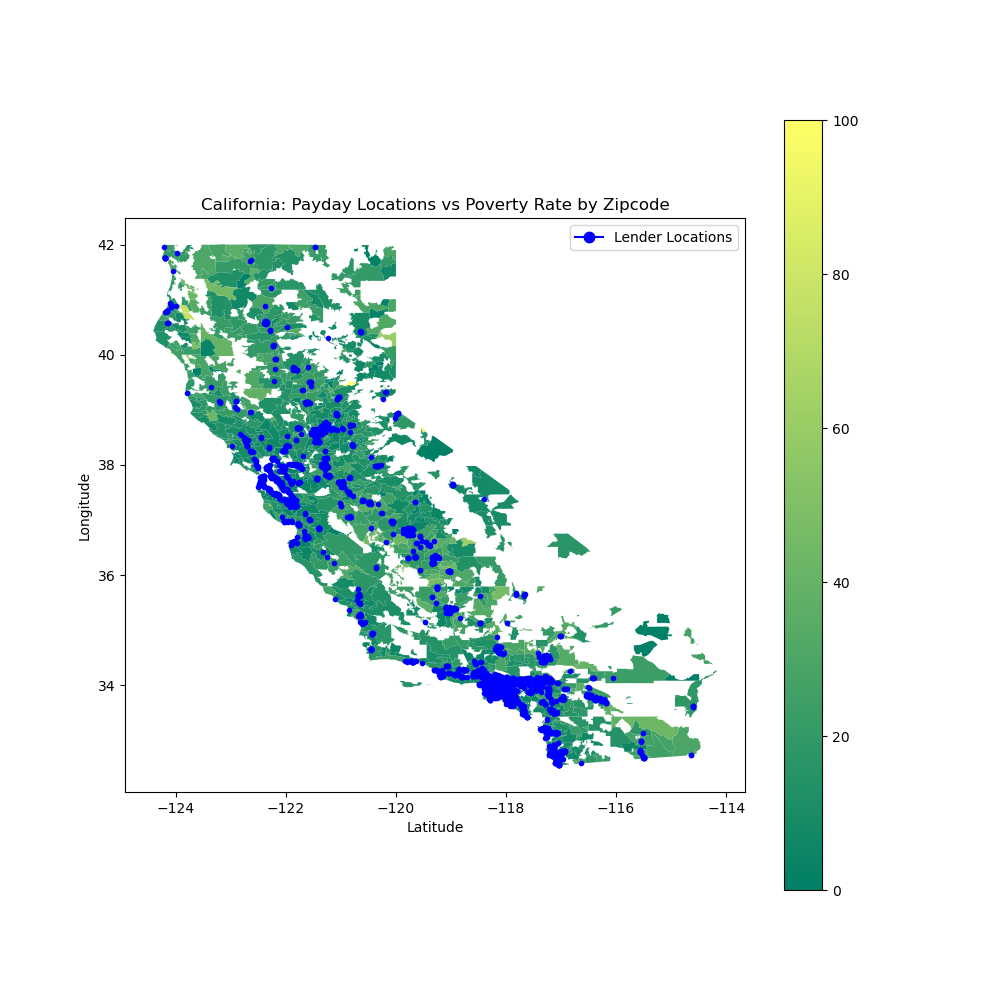

In [184]:
# Plot California Payday Locations vs Poverty Rate

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
california_geodata.plot(column = 'Poverty Rate', legend=True, cmap='summer', ax=ax);
plt.title('California: Payday Locations vs Poverty Rate by Zipcode', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend]);
california_paydaylocgeo.plot(ax=ax, marker='.', color='blue');

fig.savefig("California: Payday Locations vs Poverty Rate by Zipcode.png")

<IPython.core.display.Javascript object>


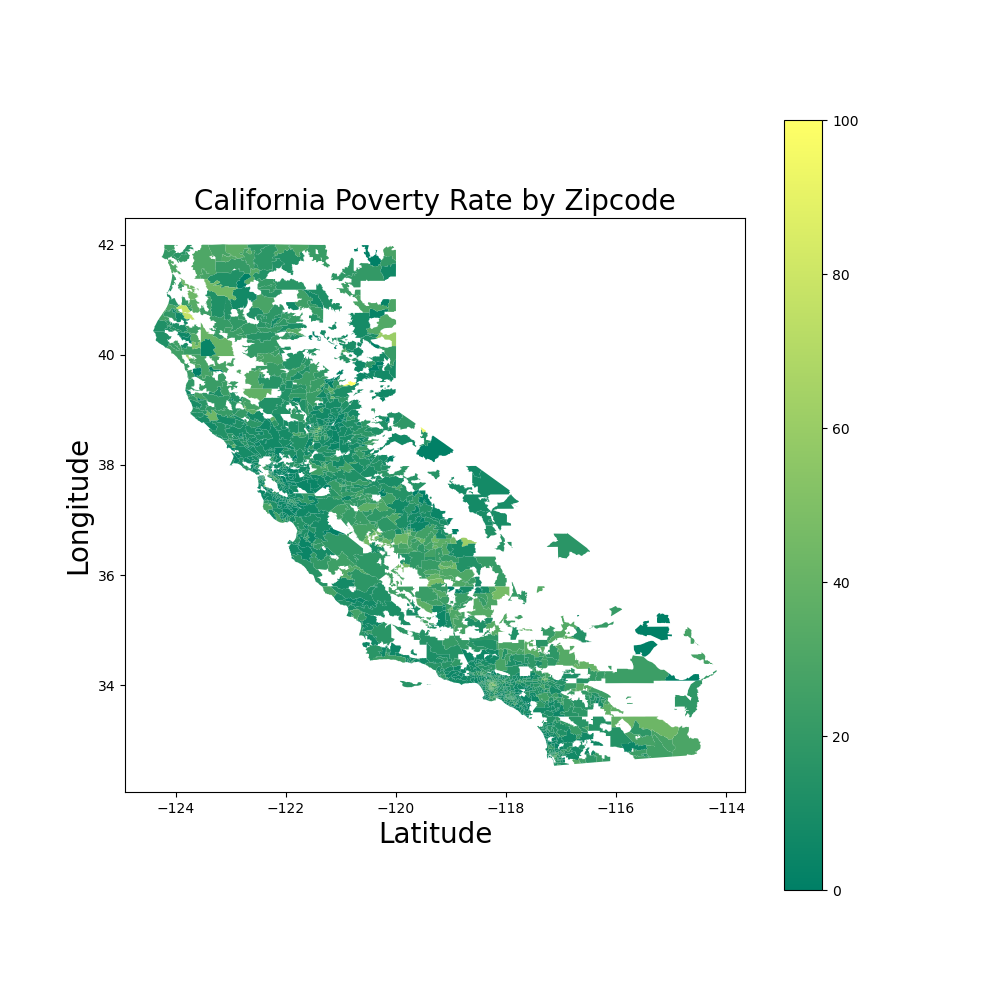

In [187]:
# Plot California Poverty Rate
               
map_choropleth(california_geodata, 'Poverty Rate', 'summer', 'California Poverty Rate by Zipcode')

In [188]:
# Calculated the percentage of the population that is minority living in poverty in Calfiornia

california_geodata['all_minority_poverty'] = (california_geodata['poverty_black_alone'] + california_geodata['population_american_indian_alone'] + california_geodata['poverty_asian_alone'] + california_geodata['poverty_native_hawaiian_alone'] + california_geodata['poverty_hispanic_origin'] + california_geodata['poverty_two_or_more_races'])/california_geodata['Population']*100

<IPython.core.display.Javascript object>


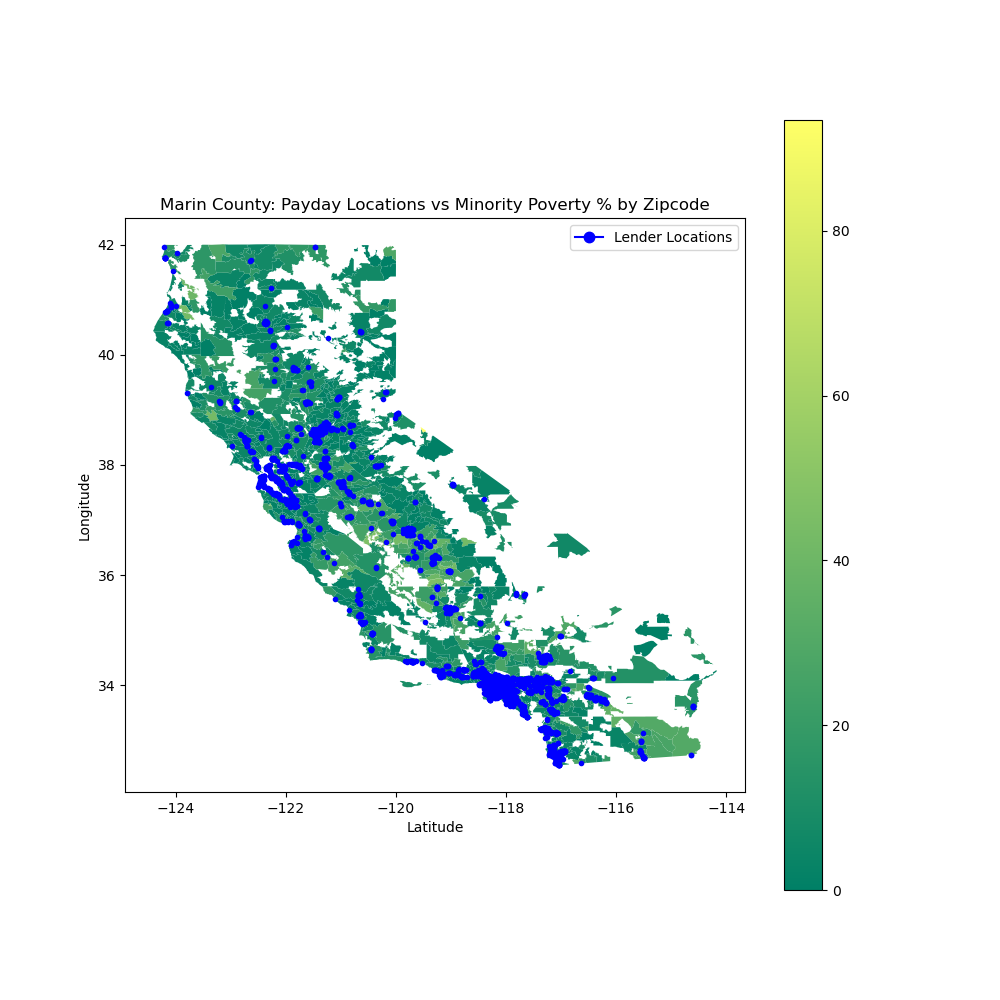

In [191]:
# Plot California Payday Locations vs Minority Poverty %

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
california_geodata.plot(column = 'all_minority_poverty', legend=True, cmap='summer', ax=ax);
plt.title('Marin County: Payday Locations vs Minority Poverty % by Zipcode', loc="center");
plt.xlabel("Latitude");
plt.ylabel("Longitude");
plt.legend(handles=[marker_legend]);
california_paydaylocgeo.plot(ax=ax, marker='.', color='blue');

fig.savefig("California Payday Locations vs Minority Poverty % by Zipcode.png")